In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#matplotlib inline
from RL_algorithm import recover

In [12]:
#calculating Zr

Wi = 9 #W initial minimum value of Wz when z=0
Wavelength = 2 #lambda
n = 5 #refractive index
Pi = np.pi
Zr = 0 #initializing the constant Zr

Zr =(Pi*(Wi**2))/(n*Wavelength)

In [13]:
#Calculating Depth(Wz)
z=2
Wz=Wi*(math.sqrt(1+(pow(z/Zr,2))))


(100, 100)


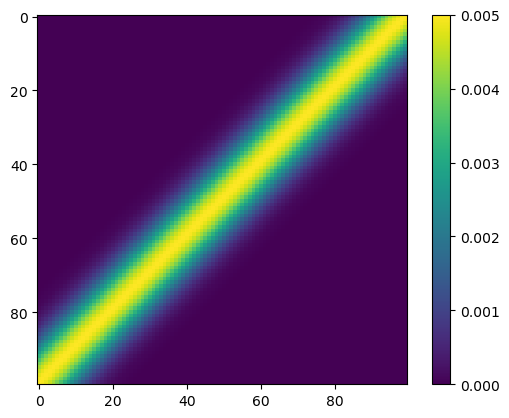

In [14]:
#estimating the point spread function PSF
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
PSF=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        PSF[i][j]= math.exp(-2*((x[i]+y[j])**2)/Wz)*0.005
print(np.shape(PSF))
plt.imshow(PSF)
plt.colorbar()

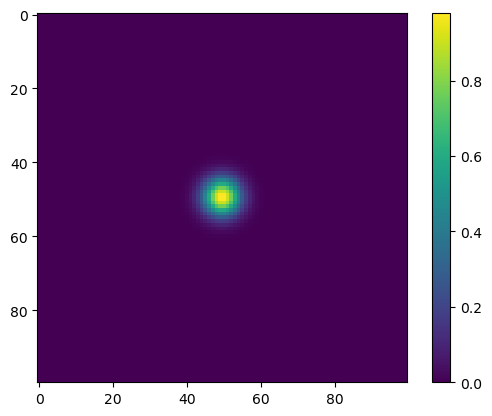

In [15]:
#Developing Raw Data:
# f(x,y)=(x + y squared)
a = np.linspace(-10,10,100)
z = np.linspace(-10,10,100)
results = np.zeros((len(a),len(z)))
def f(x,y):
    return np.exp(-(x**2+y**2))#pow(x**2-y**2,2)

for i in range(len(a)-1):
    for j in range(len(z)-1):
         results[i][j]=f(a[i],z[j])
            
# print(a)
# print(z)
GG=plt.imshow(results)
plt.colorbar(GG)

[[1.96271925e-53 1.07117114e-51 5.38778869e-50 ... 5.38778869e-50
  1.07117114e-51 0.00000000e+00]
 [4.05398036e-53 2.21249513e-51 1.11284329e-49 ... 1.11284329e-49
  2.21249513e-51 0.00000000e+00]
 [8.25041984e-53 4.50273856e-51 2.26479251e-49 ... 2.26479251e-49
  4.50273856e-51 0.00000000e+00]
 ...
 [8.25041984e-53 4.50273856e-51 2.26479251e-49 ... 2.26479251e-49
  4.50273856e-51 0.00000000e+00]
 [4.05398036e-53 2.21249513e-51 1.11284329e-49 ... 1.11284329e-49
  2.21249513e-51 0.00000000e+00]
 [1.96271925e-53 1.07117114e-51 5.38778869e-50 ... 5.38778869e-50
  1.07117114e-51 0.00000000e+00]]


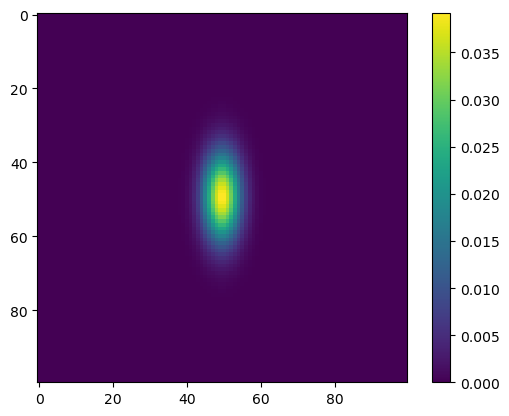

In [16]:
# Convoluting raw data using transfare matrix
measuredResults = np.matmul(PSF,results)
plt.imshow(measuredResults)
plt.colorbar()
print(measuredResults)

In [17]:
# #distorting measured results
# for i in range(len(measuredResults)):
#     for j in range(len(measuredResults)):
#         if (measuredResults[i][j]>20):
#             #max function to discard negative values in the measured results
#             measuredResults[i][j]= max(0,np.random.normal(measuredResults[i][j],20*np.sqrt(measuredResults[i][j])))

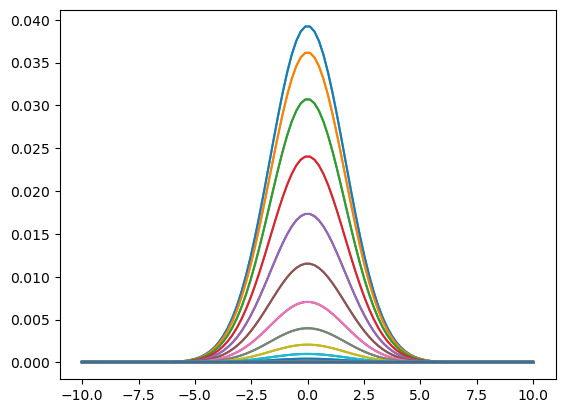

In [18]:
#find the constant of normalizing matrix (Pij/Pj)
# W=2
# P=np.matmul([W]*len(PSF),PSF)
# con=np.divide(W*PSF,PSF)
# U = measuredResults
# plt.imshow(U)
# plt.colorbar()
#for i in range(100): 
plt.plot(a,measuredResults)#[i,:])
plt.plot(a,results[1,:])
plt.show()

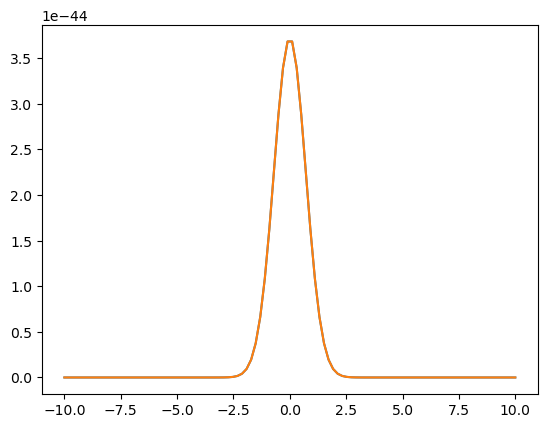

0


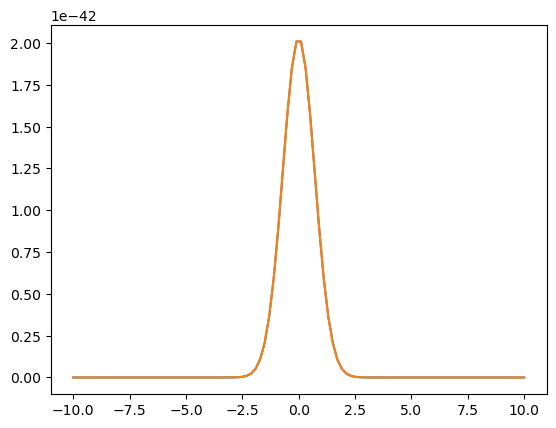

1


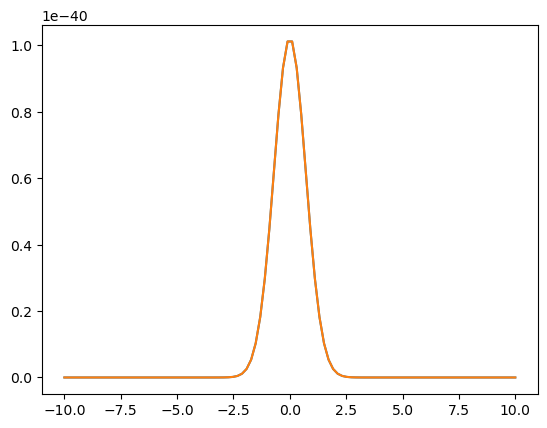

2


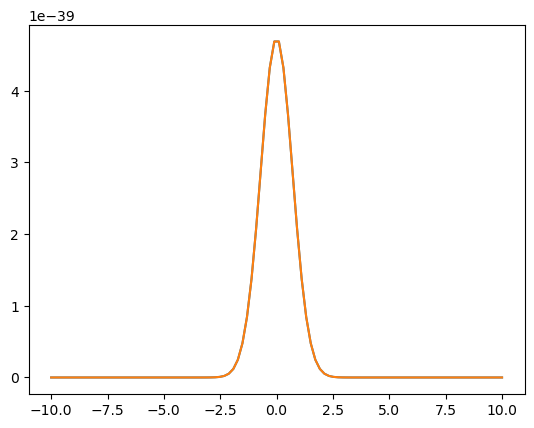

3


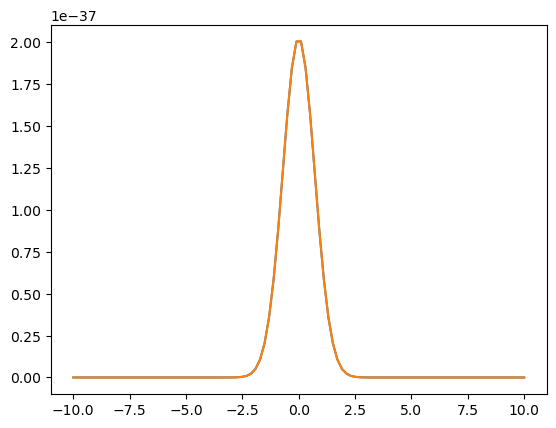

4


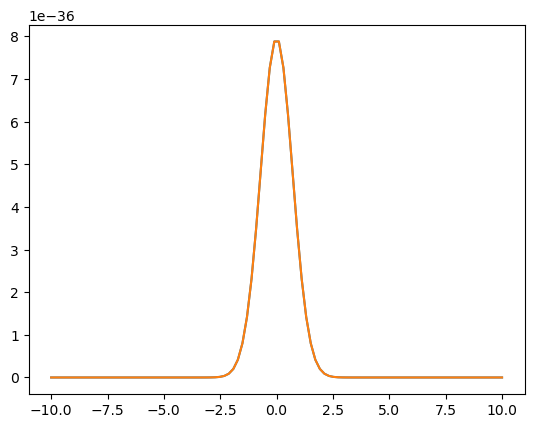

5


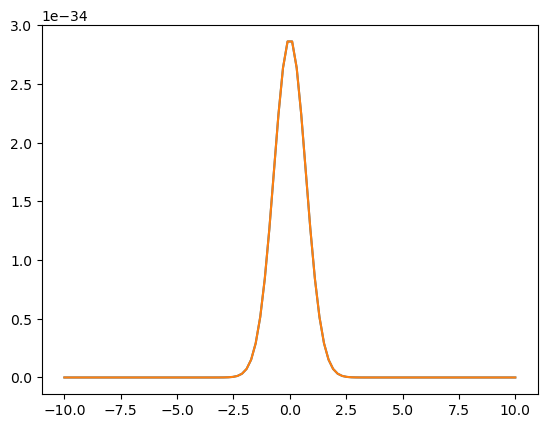

6


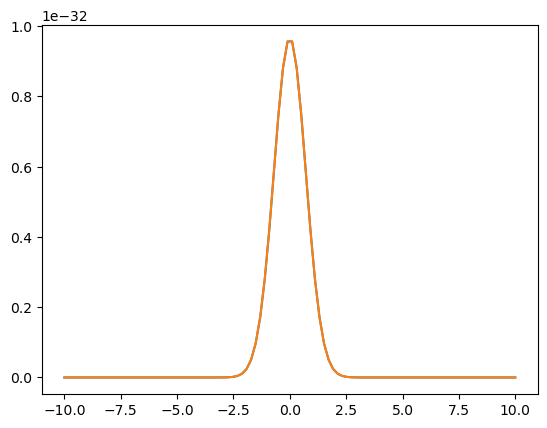

7


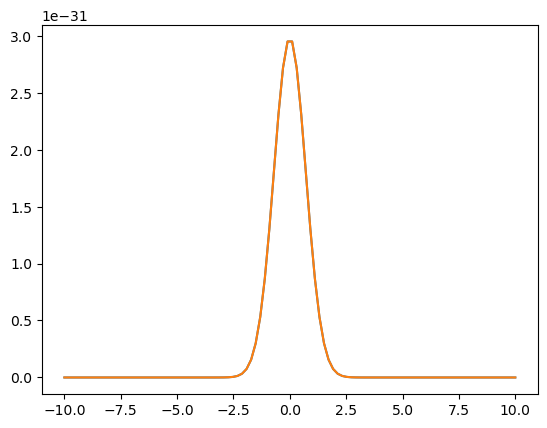

8


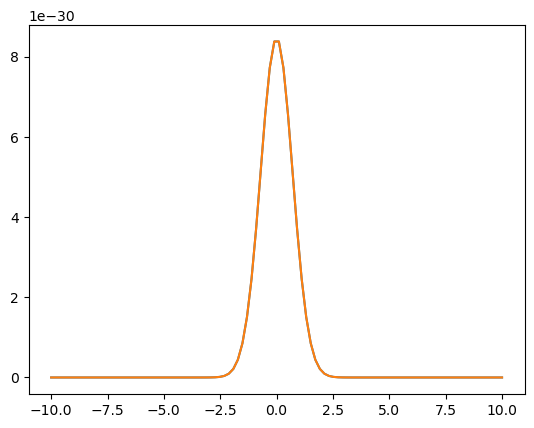

9


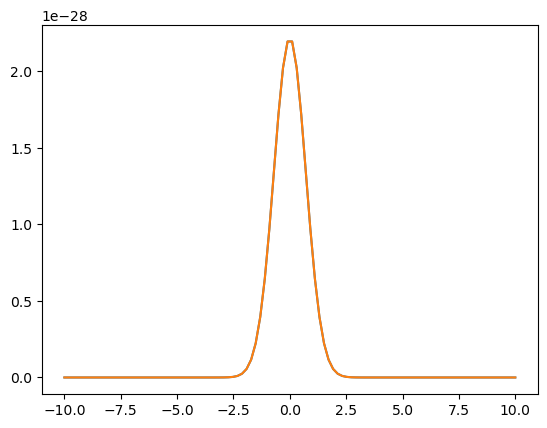

10


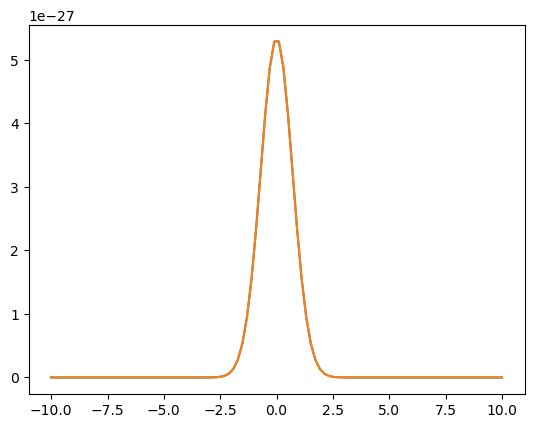

11


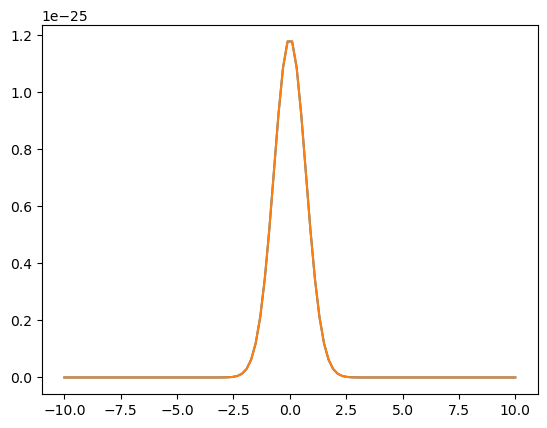

12


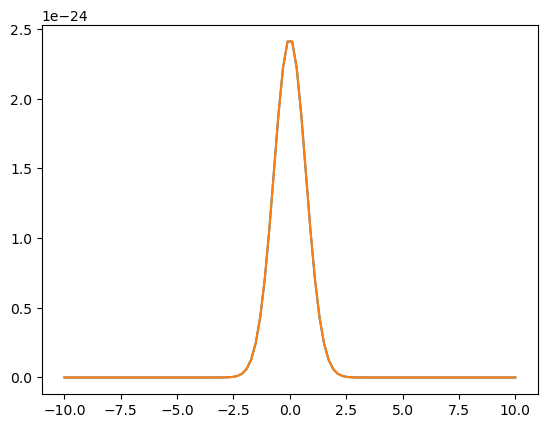

13


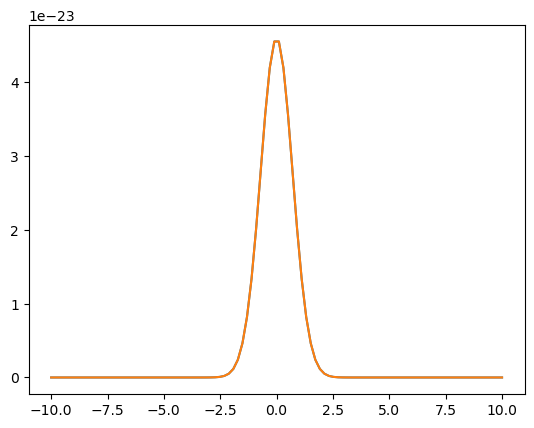

14


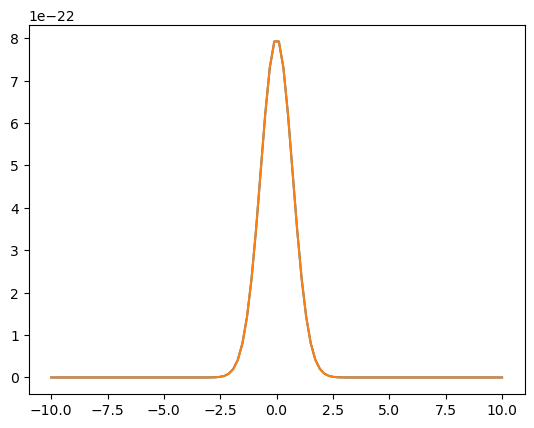

15


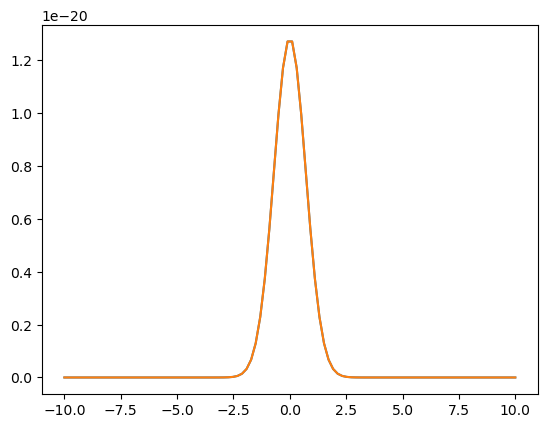

16


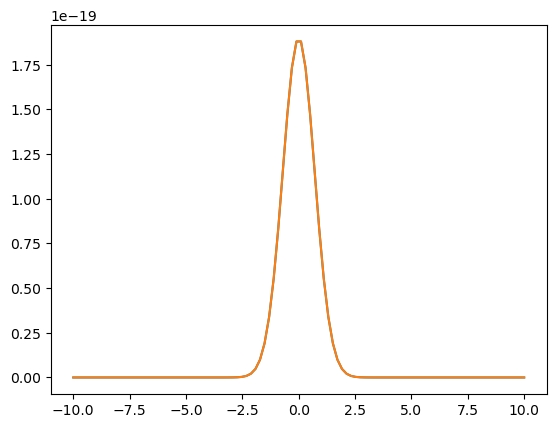

17


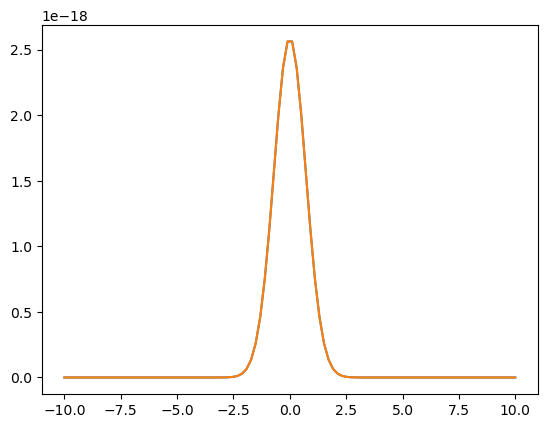

18


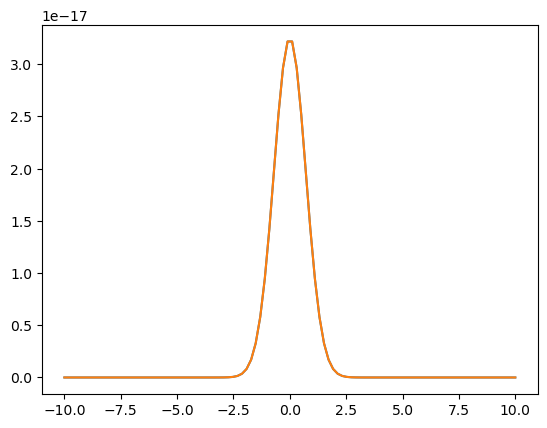

19


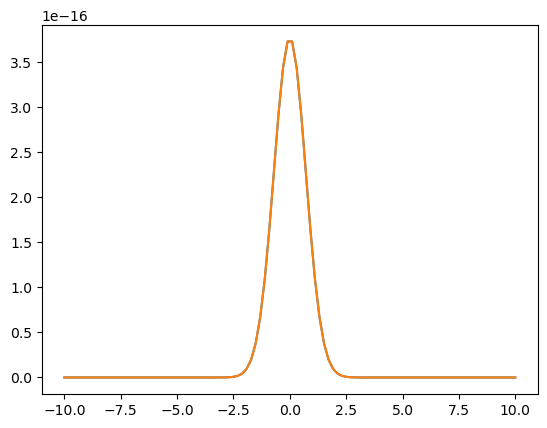

20


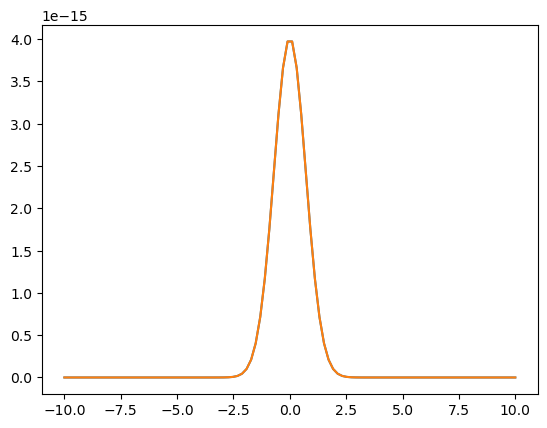

21


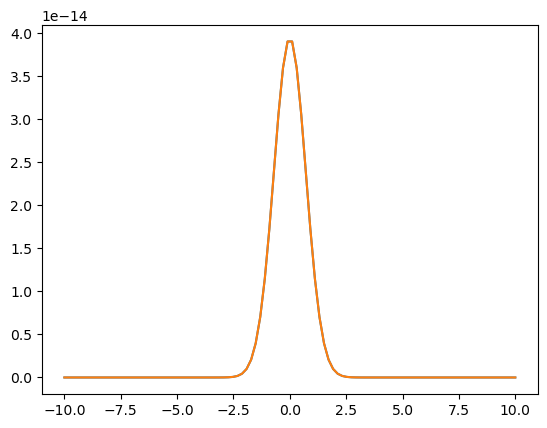

22


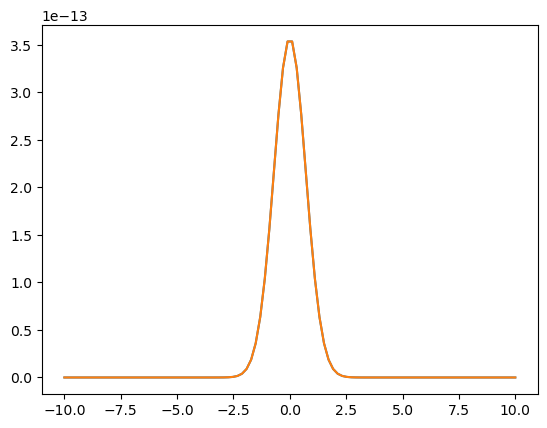

23


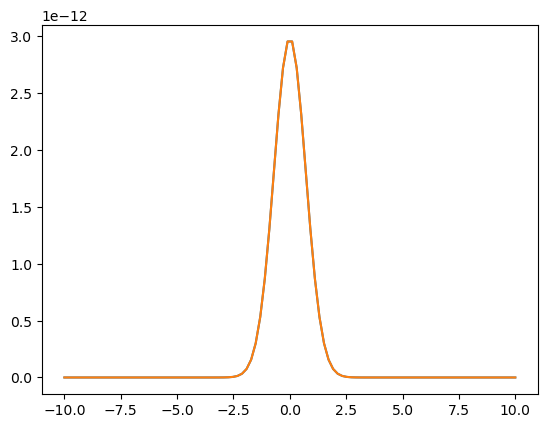

24


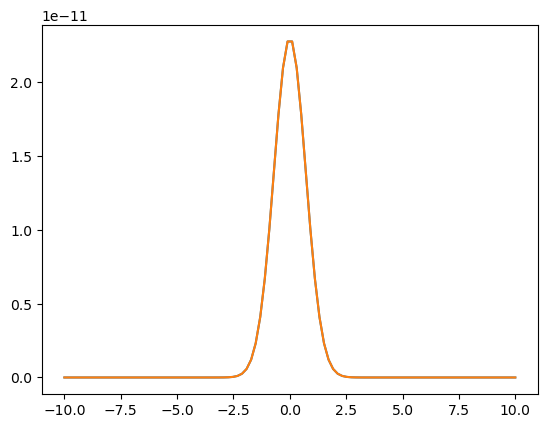

25


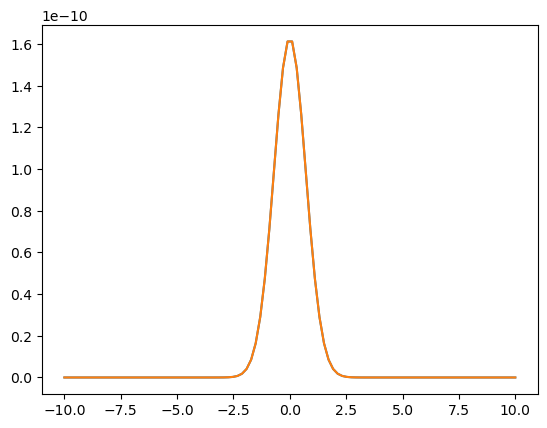

26


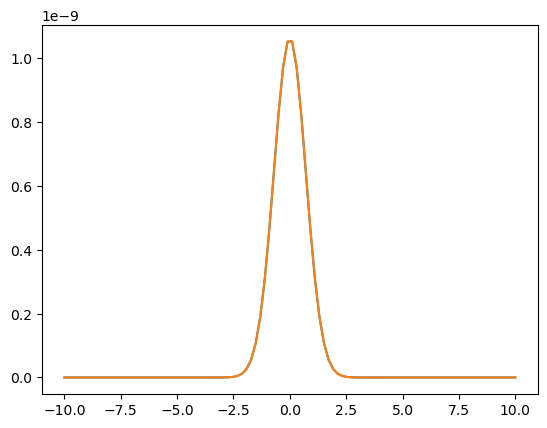

27


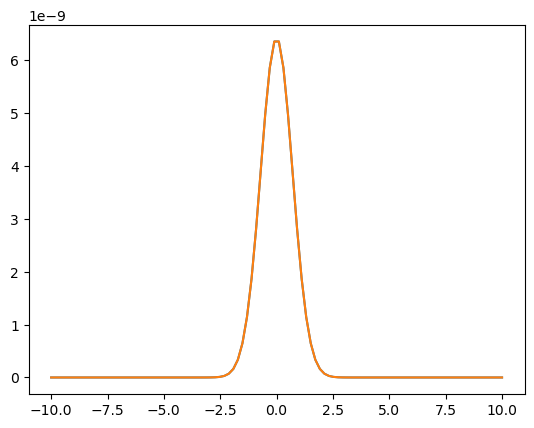

28


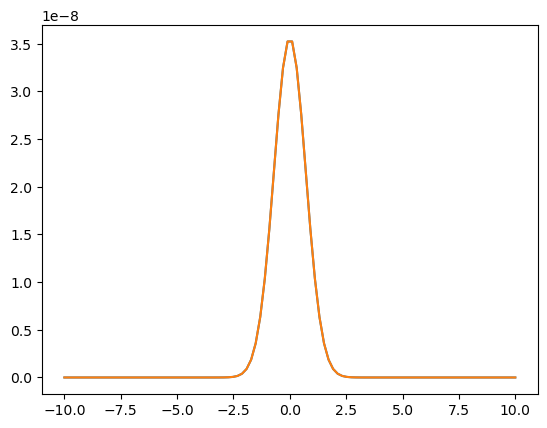

29


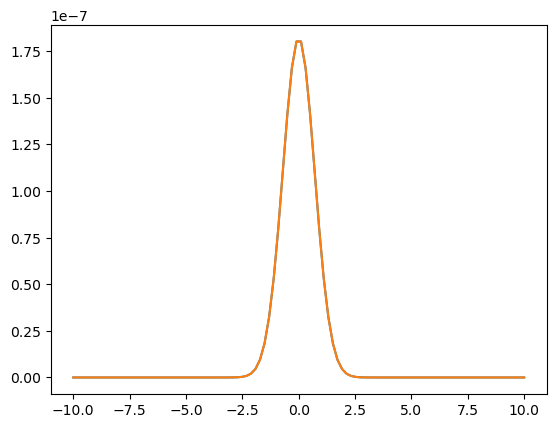

30


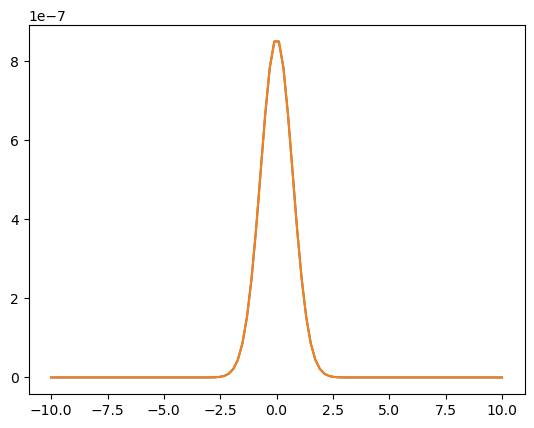

31


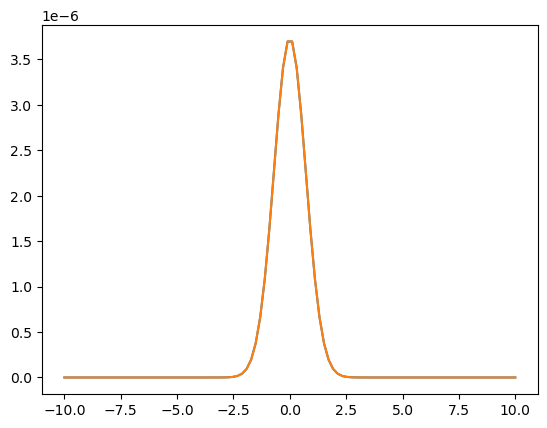

32


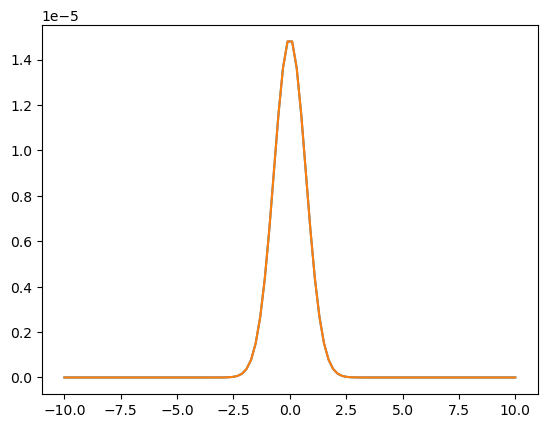

33


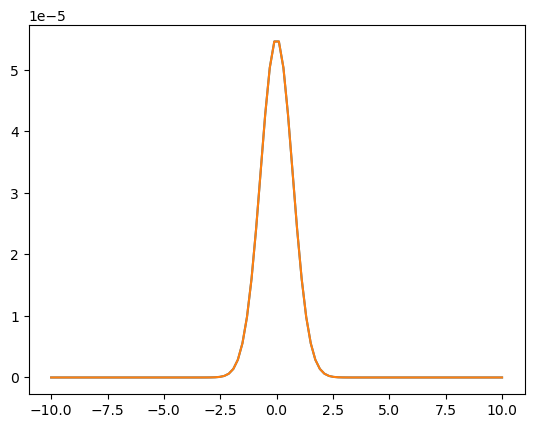

34


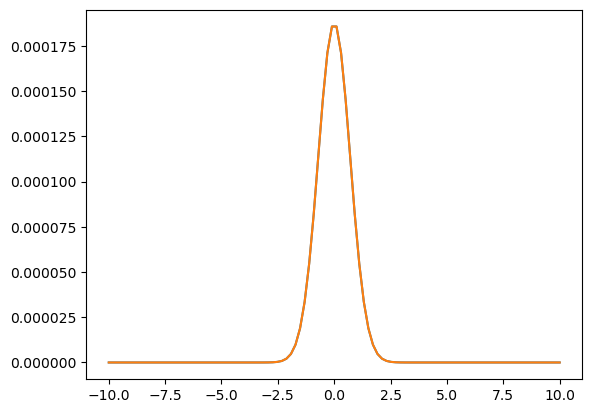

35


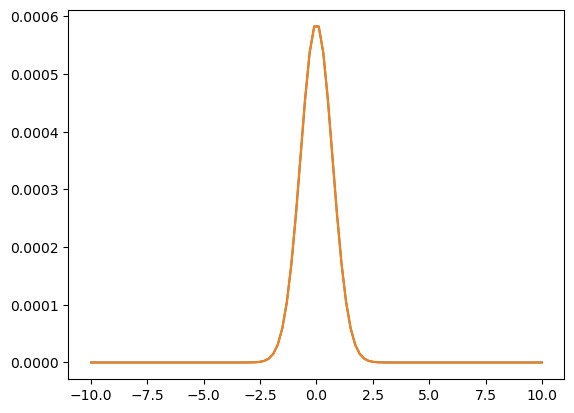

36


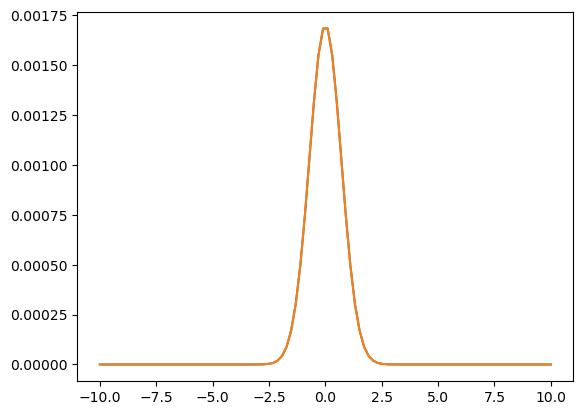

37


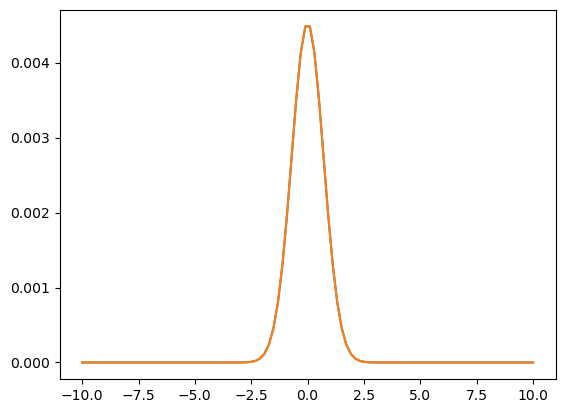

38


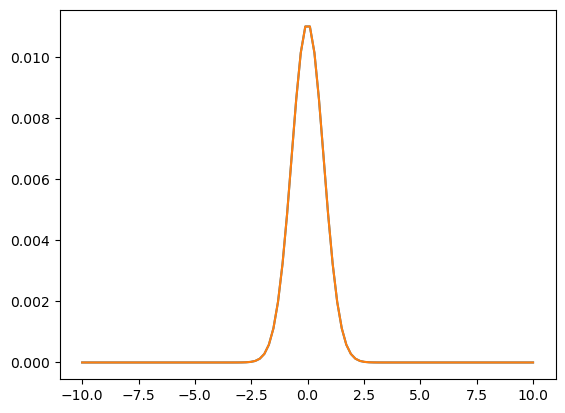

39


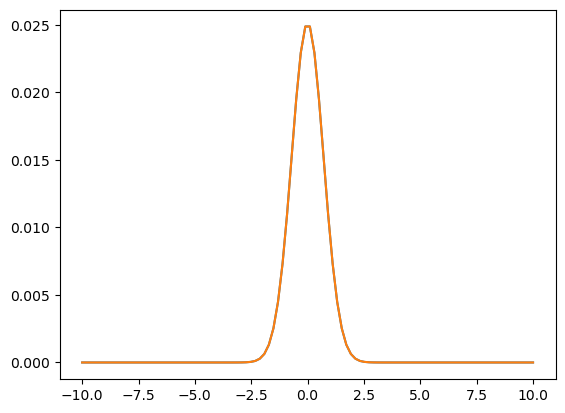

40


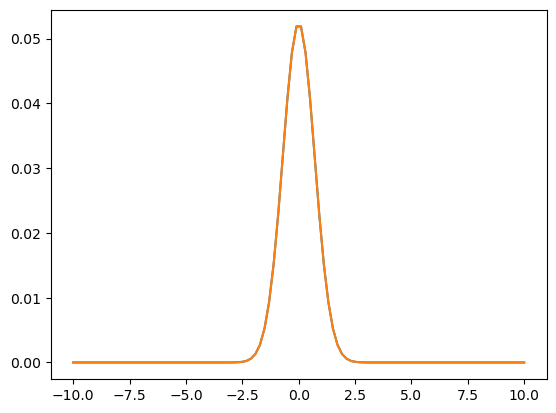

41


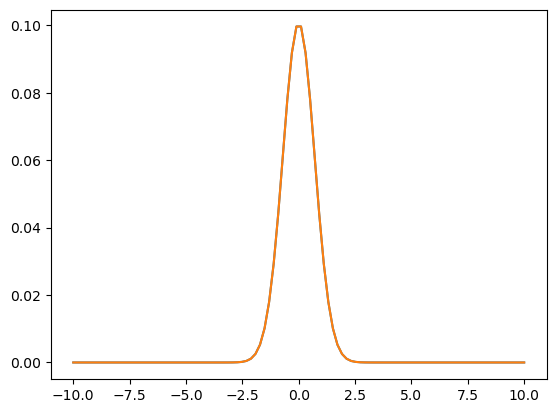

42


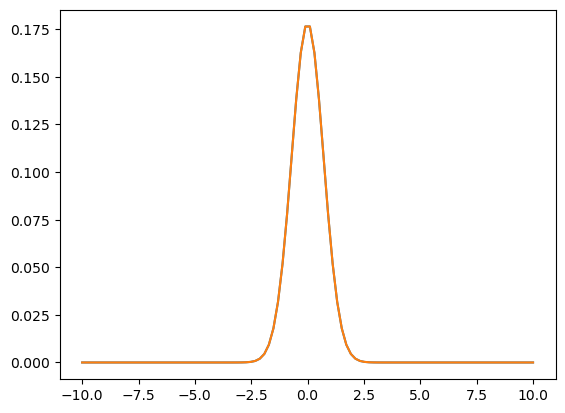

43


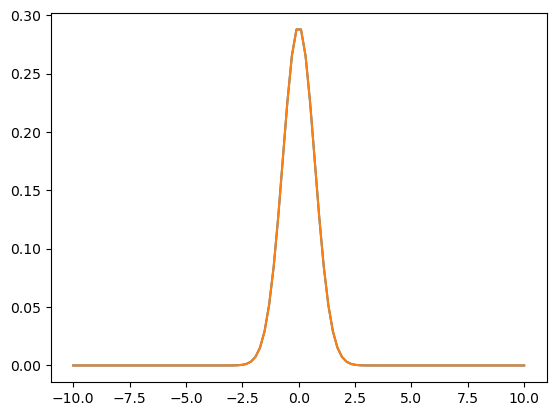

44


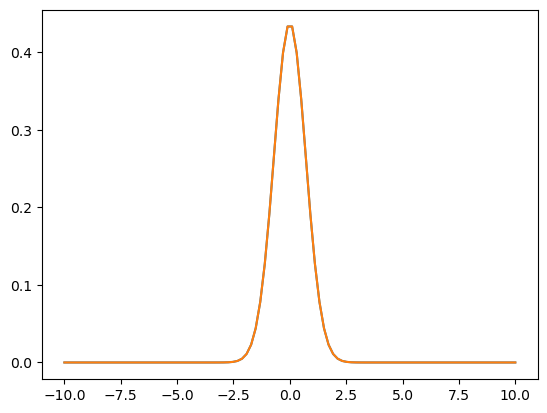

45


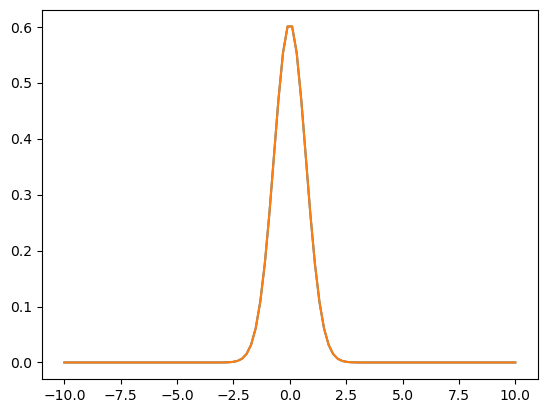

46


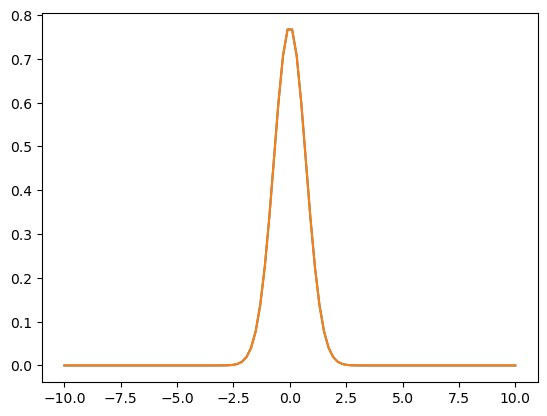

47


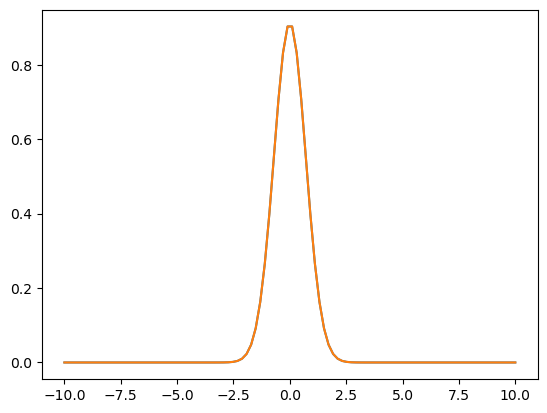

48


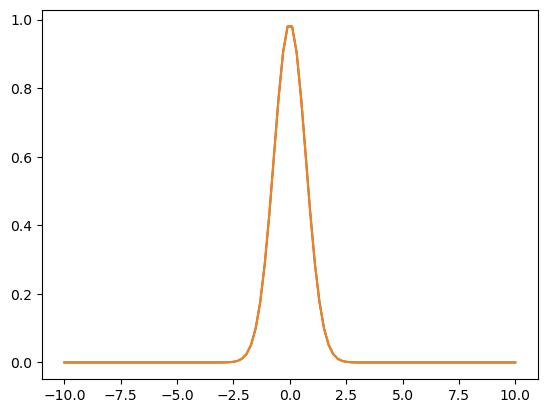

49


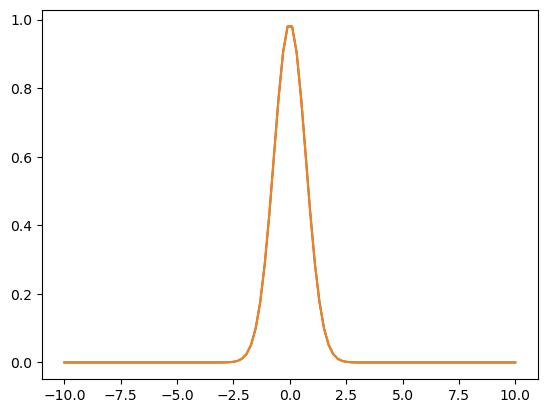

50


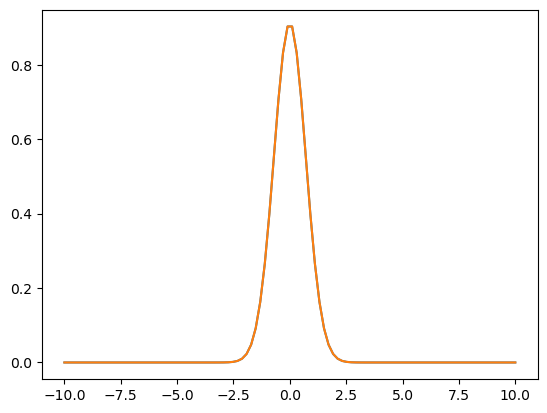

51


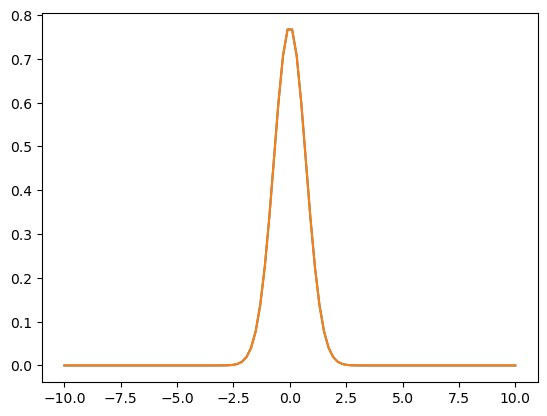

52


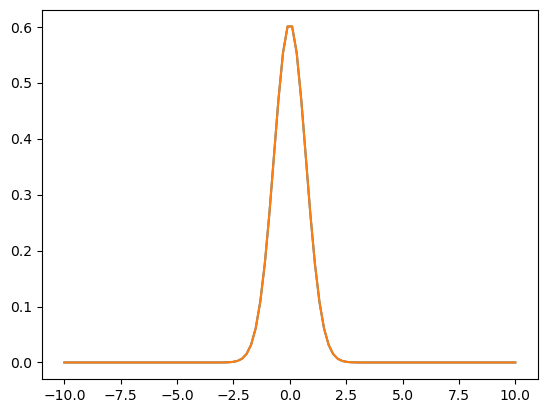

53


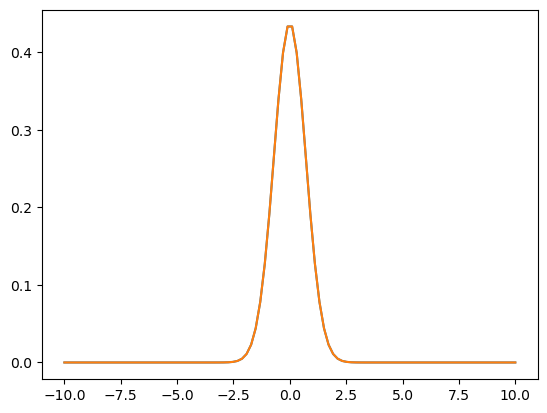

54


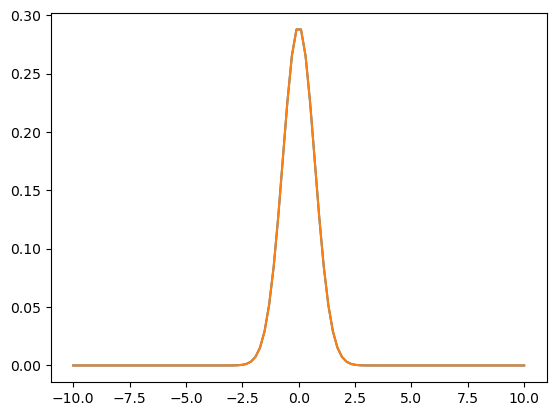

55


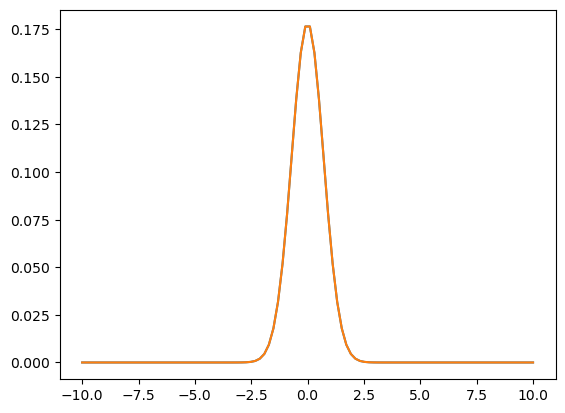

56


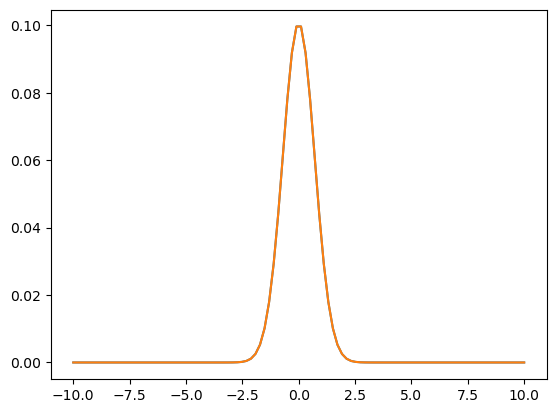

57


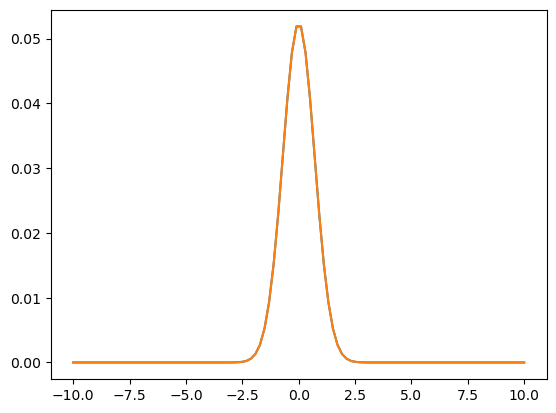

58


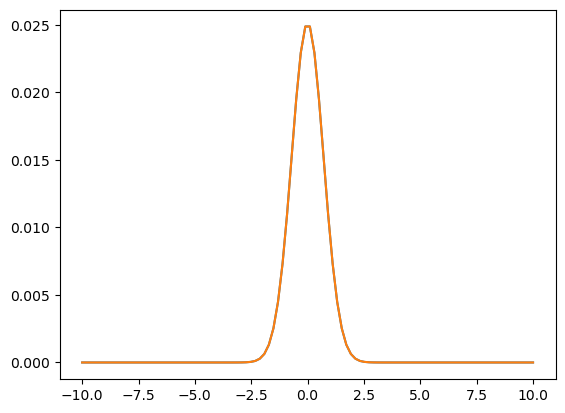

59


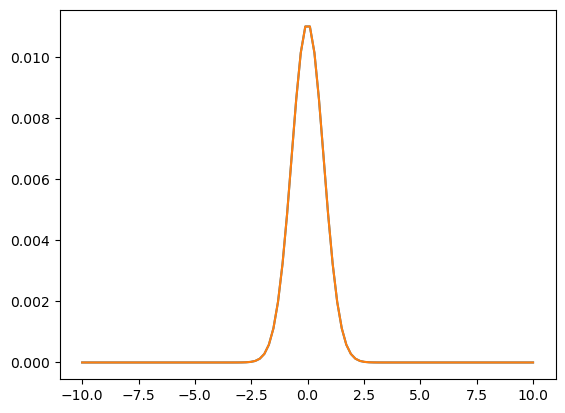

60


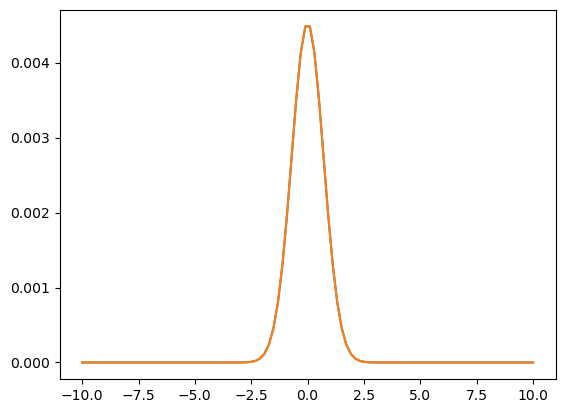

61


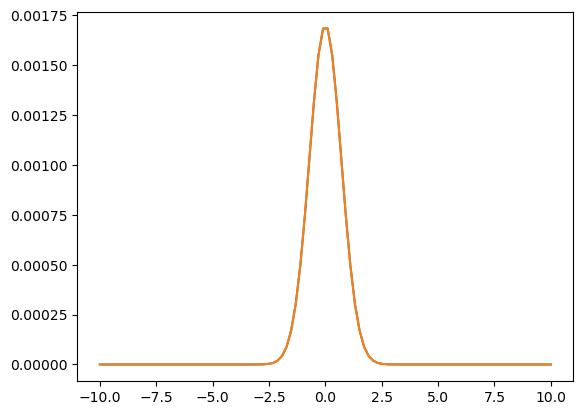

62


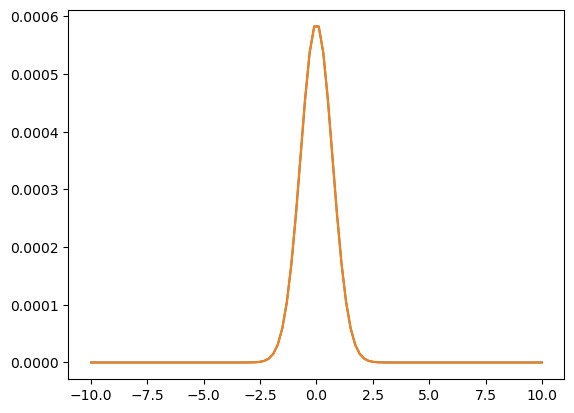

63


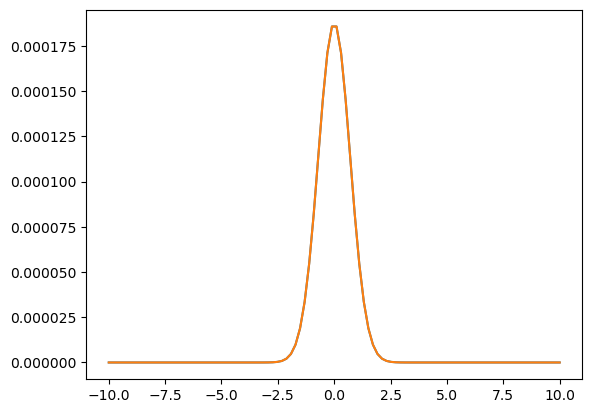

64


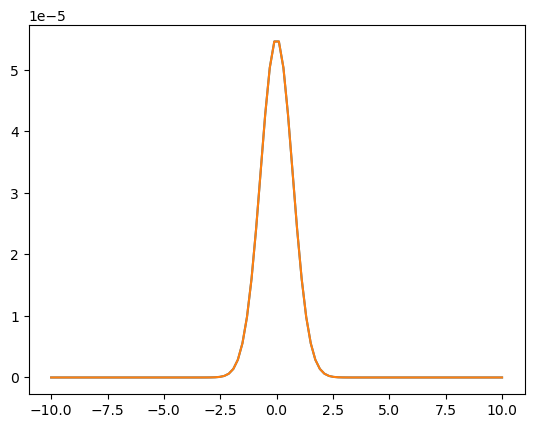

65


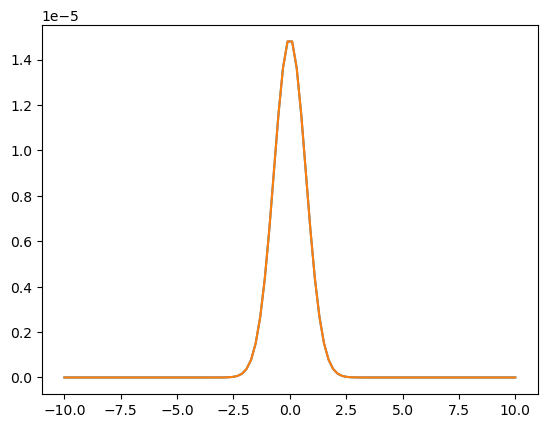

66


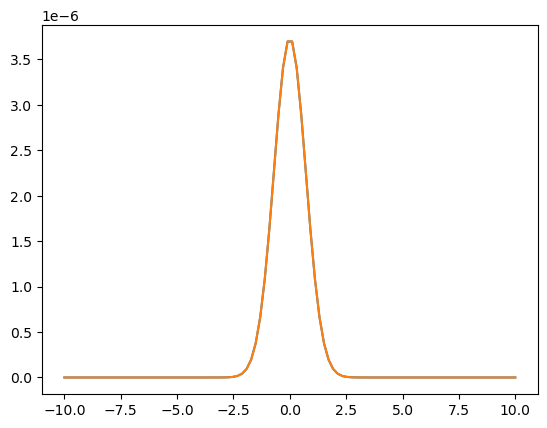

67


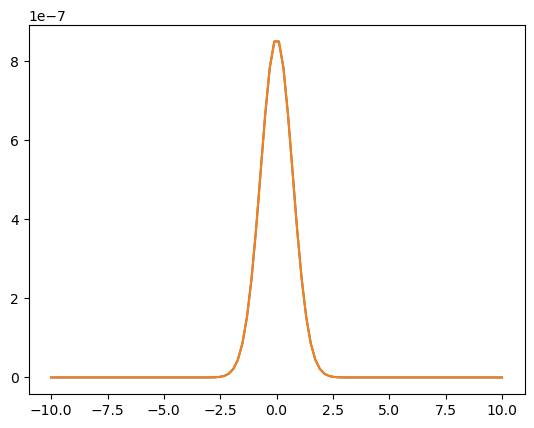

68


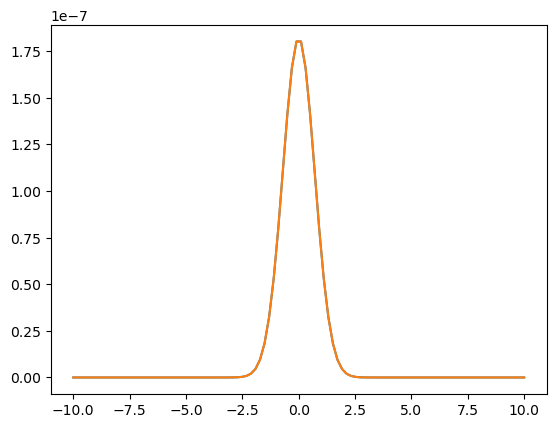

69


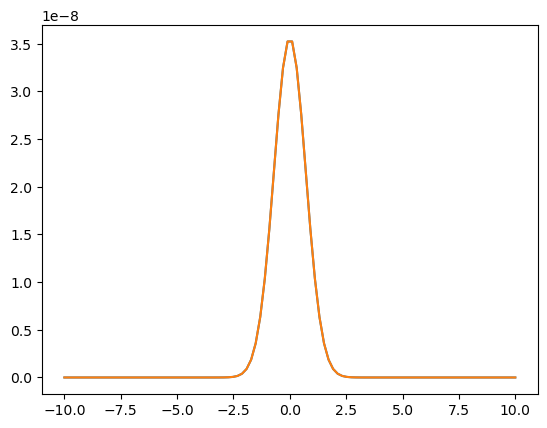

70


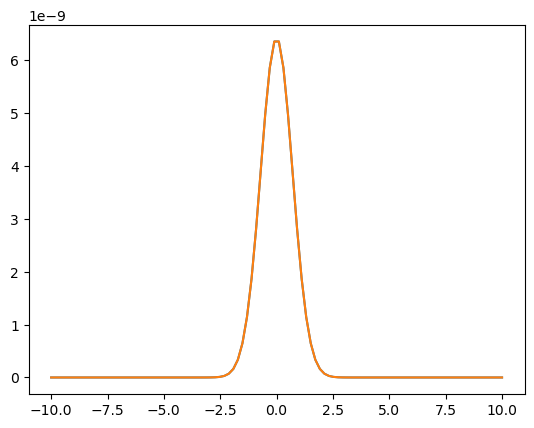

71


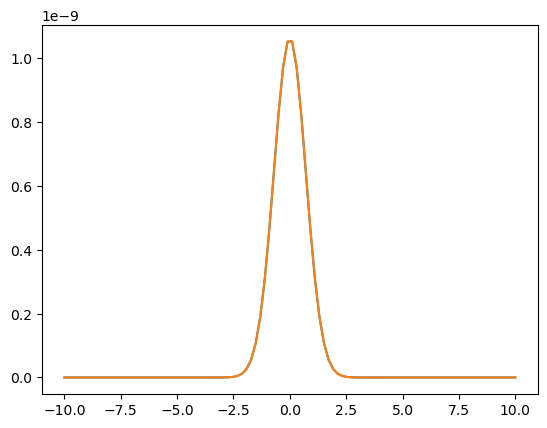

72


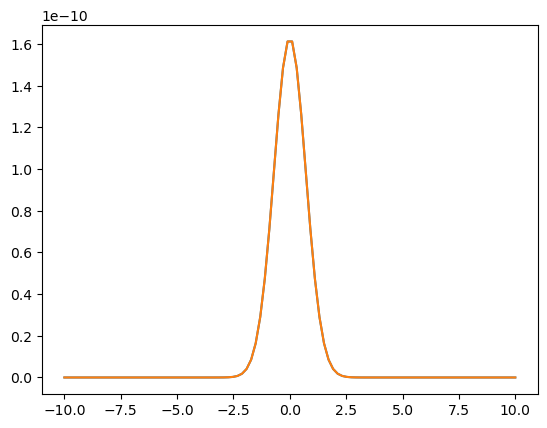

73


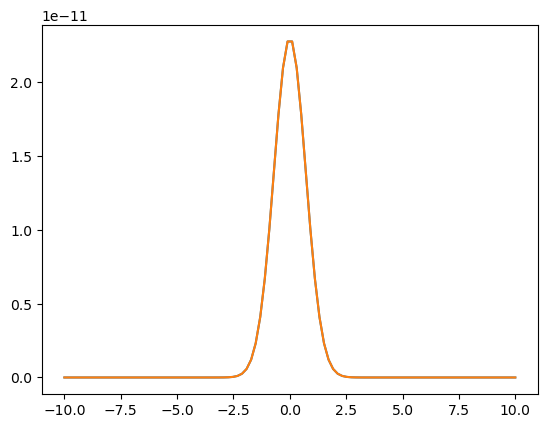

74


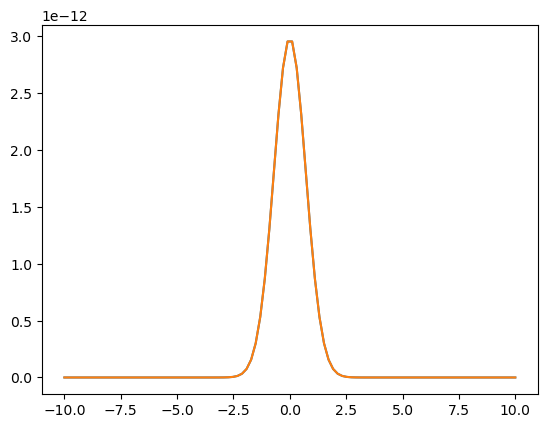

75


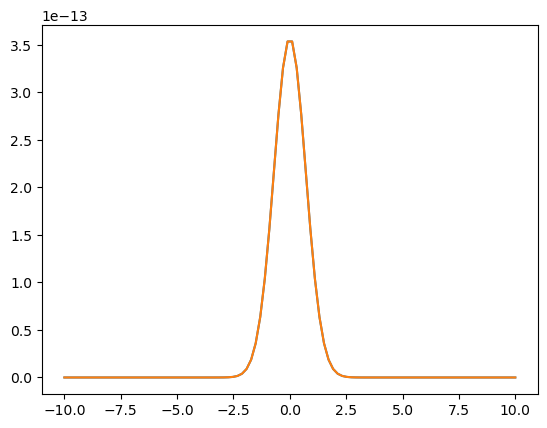

76


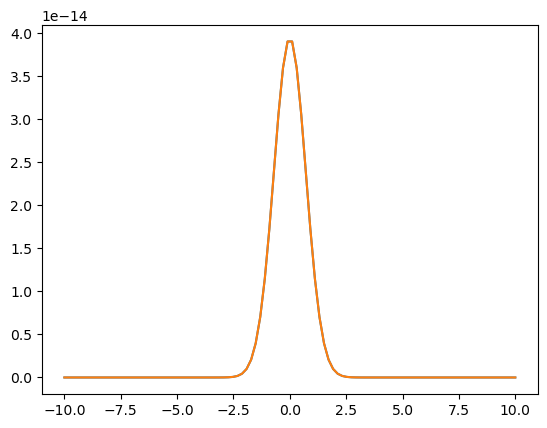

77


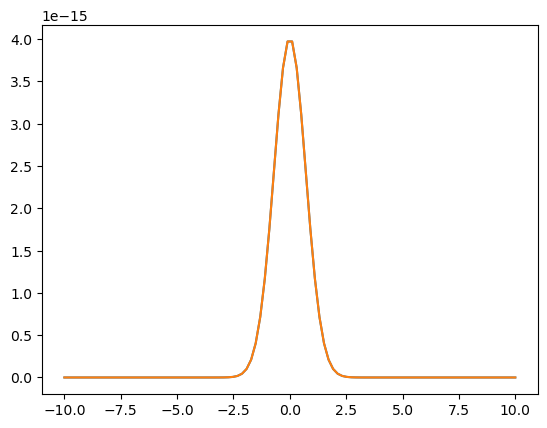

78


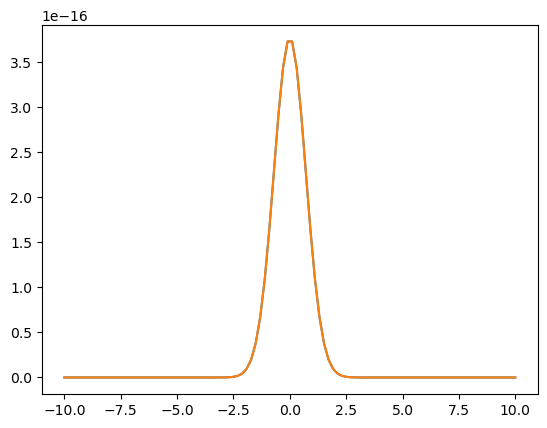

79


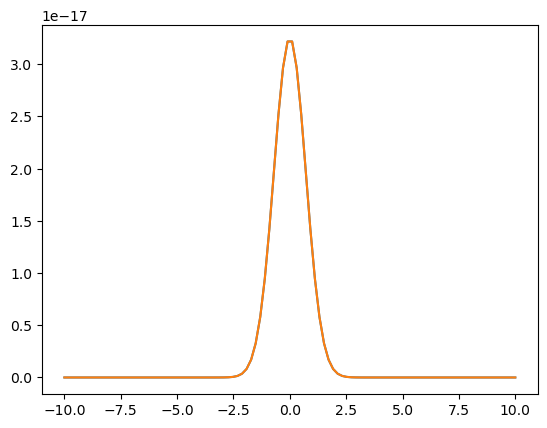

80


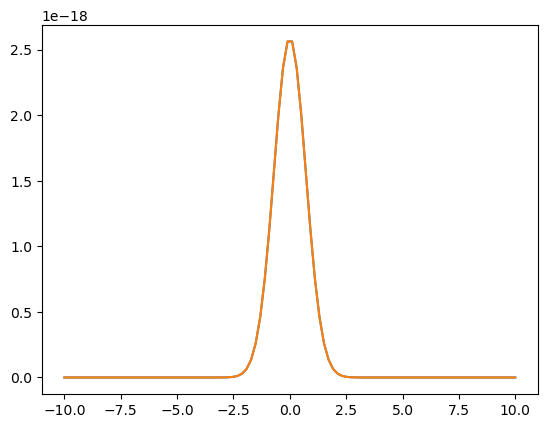

81


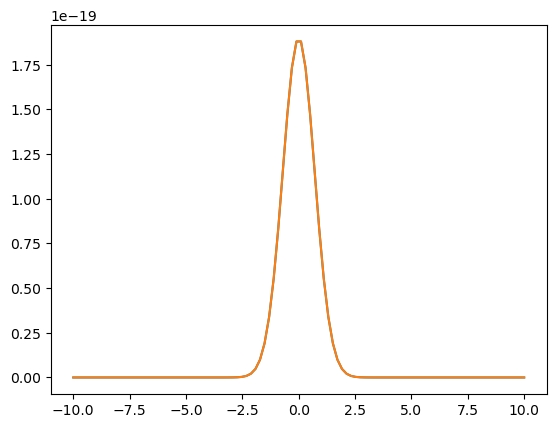

82


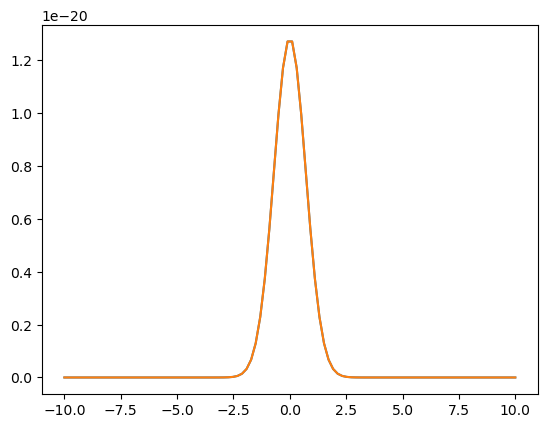

83


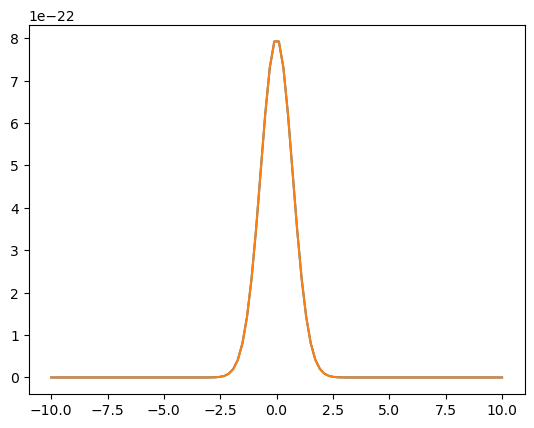

84


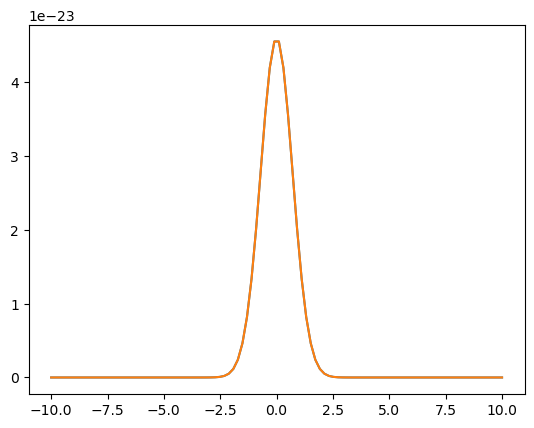

85


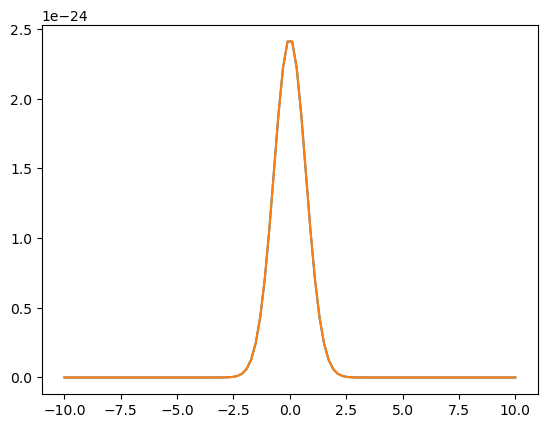

86


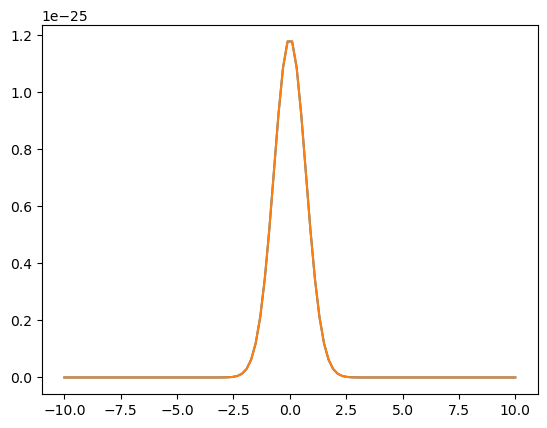

87


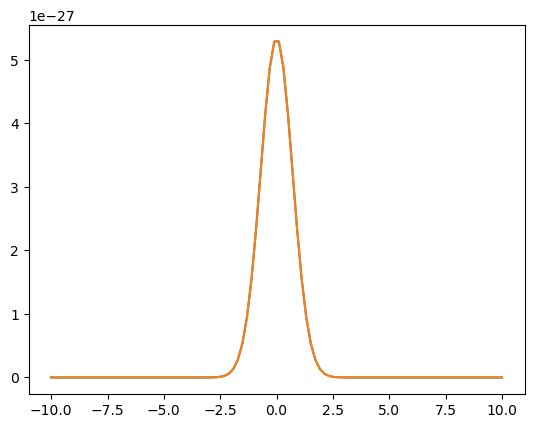

88


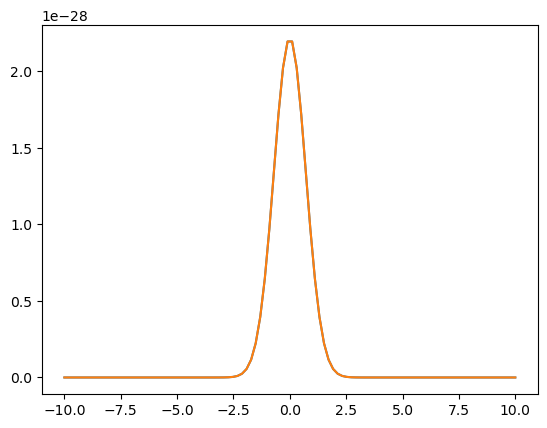

89


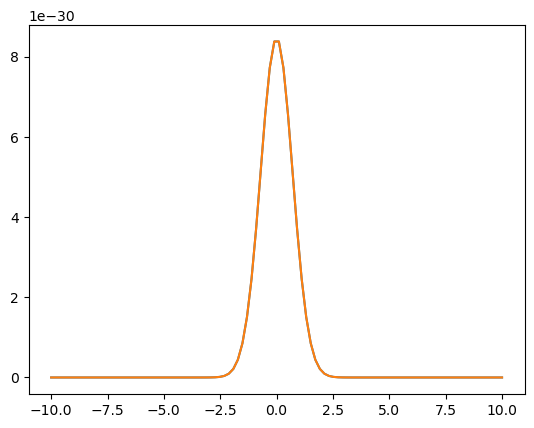

90


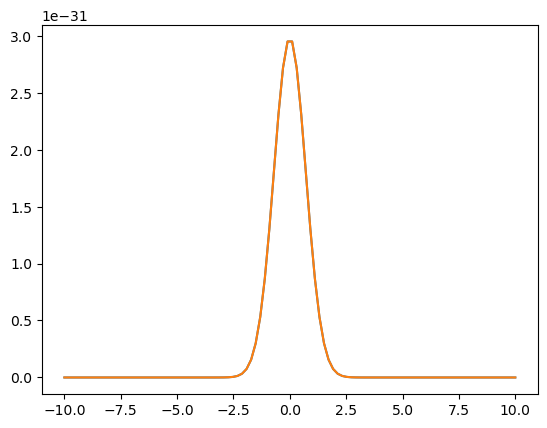

91


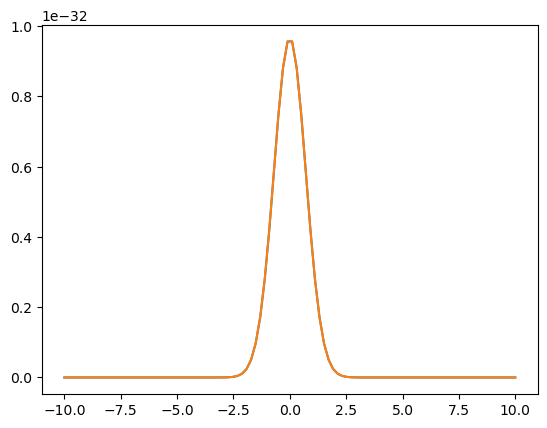

92


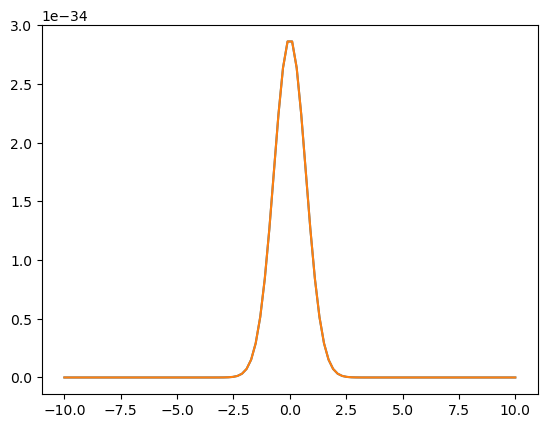

93


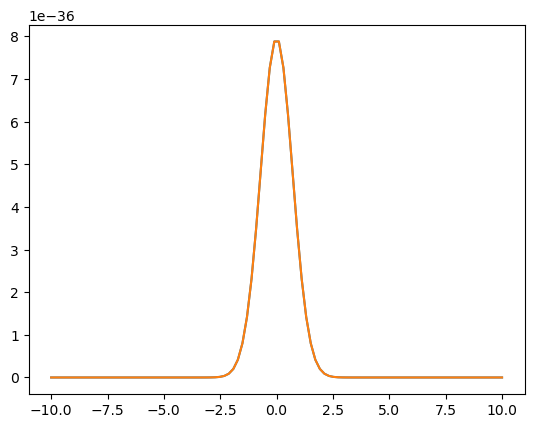

94


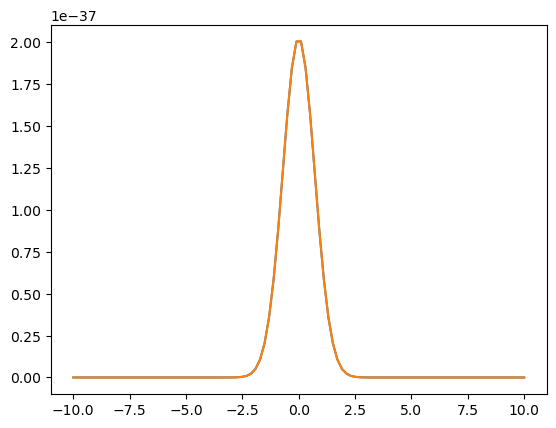

95


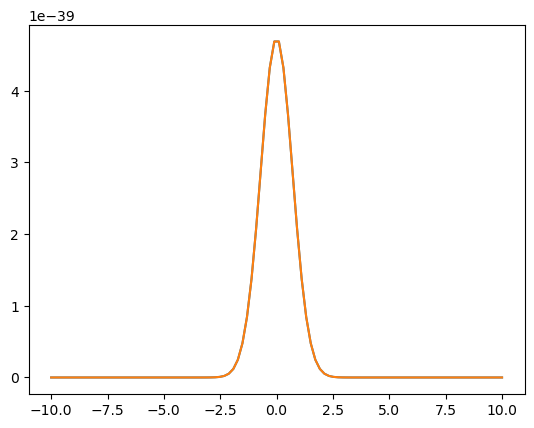

96


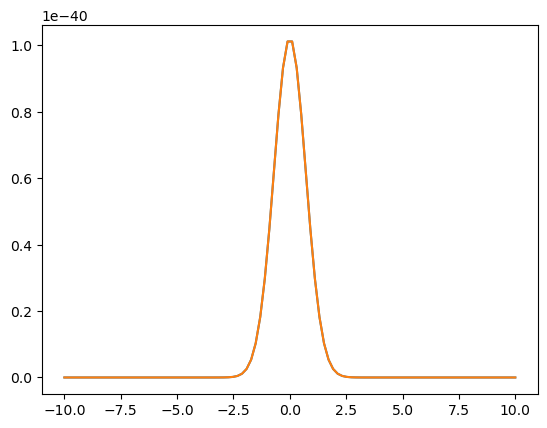

97


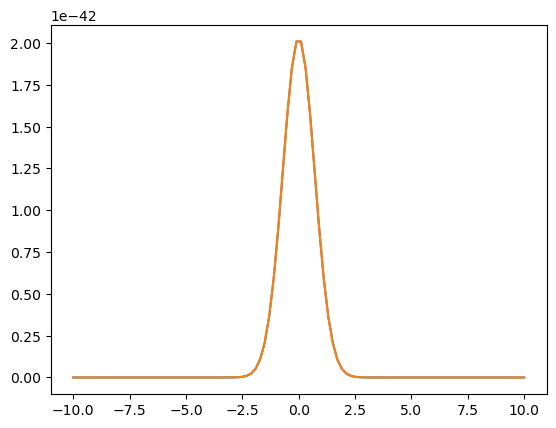

98


In [19]:
Sigm1=(1+0.00*np.ones(len(a)))#(1+0.0*(Ez[10:80]/2)**2)#
Sigm2=(1-0.00*np.ones(len(a)))#(1-0.0*np.ones(len(r)))#(1-0.000251*(Ez[10:80]/8)**2)#np.ones(len(bincenter1)))#(1+(bincenter1/4)**2)))
I11=1/Sigm1
I22=1/Sigm2
Rest=np.zeros((len(a),len(a)))
for k in range(len(a)-1):
    F=recover(measuredResults[:,k],PSF,1,10000,I11,I22,100,100)
    plt.plot(a,results[k,:])
    plt.plot(a,F[0])
    plt.show()
    print(k)
    for h in range(len(F[0])):
        Rest[k][h]=F[0][h]

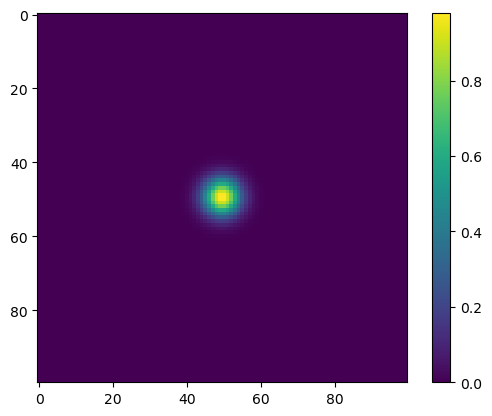

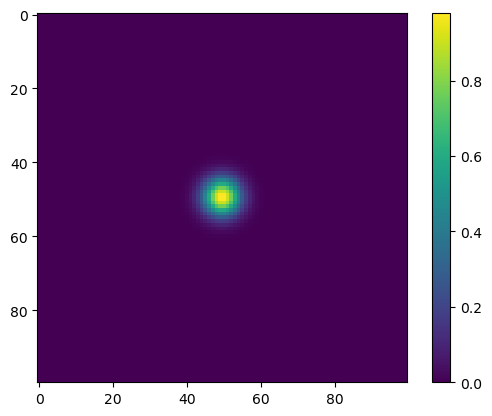

In [20]:
# #Find working fj:
# def working_fj(PSF,result):
#     return np.matmul(PSF,result)

# result=np.ones(len(PSF))
# fnj=working_fj(PSF,result)
# print(F)
# plt.plot(a,F[0])
# plt.plot(a,results[:,1])
# plt.show()
GG1=plt.imshow(Rest)
plt.colorbar(GG1)
plt.figure()
GG=plt.imshow(results)
plt.colorbar(GG)

In [21]:
# #Not Working
# def Regular(recovered):
#     c=1 #current
#     p=c-1 #past
#     f=c+1 #future
#     Wrt=0.02 #rationalizing "weight"
#     for i in range(len(recovered)-1):
#         for j in range(len(recovered)):
#             if ((recovered[i][p]>recovered[i][c]) and (recovered[i][c]<recovered[i][f])):
#                 recovered[i][c]=(recovered[i][c]/(1-Wrt))
#             elif ((recovered[i][c]>recovered[i][p]) and (recovered[i][c]>recovered[i][f])):###change after and  recovered[p] torecovered[f]###
#                 recovered[i][c]=(recovered[i][c]/(1+Wrt))
#             else:
#                 recovered[i][c]=recovered[i][c]
#             c+=1
#             p=c-1
#             f=c+1
#             if f==len(recovered):
#                 break
#     return recovered

In [22]:
# def Recover(actual,measured,varying,k):
#     var = np.divide(measured,varying)
#     prem_res = np.matmul(var,k)
#     final_result= prem_res*actual
#     return final_result

In [23]:
# rec =np.ones(len(x))
# n=0
# while (n<500):
#     fnj=working_fj(PSF,rec)
#     rec=Recover(rec,measuredResults,fnj,con)
#     #rec=Regular(rec) no regularization yet
#     n+=1
# recovered=rec.copy()

In [24]:
 Z = results
 U = measuredResults
 R = Rest
# #error Bands

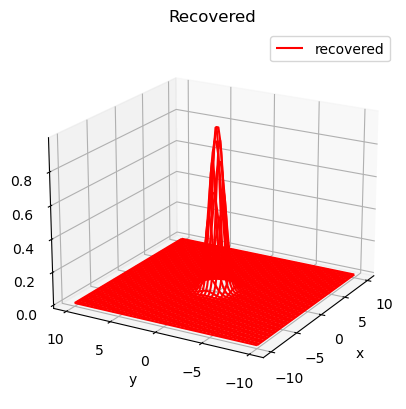

In [25]:
#Plots
# make the origin consistent for all axis
X, Y = np.meshgrid(x, y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=20, azim=-150)
ax.plot_wireframe(X, Y, Z, color = "red", label="recovered" )
ax.set_title('Recovered')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

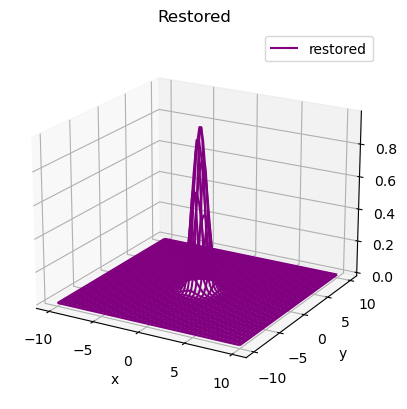

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=20, azim=-60)
ax.plot_wireframe(X, Y, R, color = "purple", label="restored" )
ax.set_title('Restored')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

In [27]:
# plt.plot(x,y)
# plt.show()

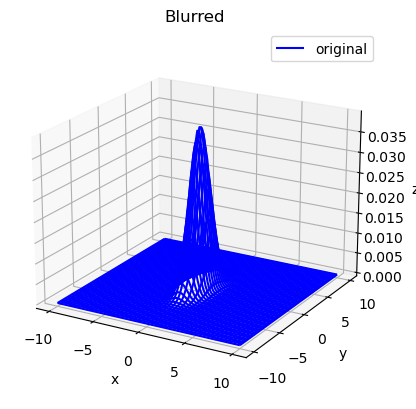

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=20, azim=-60)
ax.plot_wireframe(X, Y, U, color="blue", label="original")
#ax.plot_wireframe(X, Y, R, color = "purple", label="restored" )
ax.set_title('Blurred')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()